# FAERS Public dataset download

### Importing all the necessary libraries

In [1]:

import geopandas as gpd

import pandas as pd
#import vaex as vd
import numpy as np
from shapely.geometry import Point

#For data handling and munging. This is an extremely powerful tool
#for working with data in a spreadsheet-like format. If you’re familiar with R data.frames, then you’ll love pandas.
import fiona
#fiona - For making it easy to read/write geospatial data formats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#for plotting

import os
#sys library

from functools import reduce

In [2]:
#importing
#requesting files over the internet
#import requests
import urllib.request

#unpacking zipfiles
import zipfile
import tarfile
import urllib.request, shutil


###mounting drive**

In [6]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.chdir(r"D:\Research\FAERS_Public_Similarity\Data\zip")

## Importing latest FAERS dataset from openFDA api


#### brute force download (use 1 only)


In [4]:
#brute force download
for i in range(2013,2021):
    for j in range (1,5):
        url = "https://fis.fda.gov/content/Exports/faers_ascii_"+str(i)+"q"+str(j)+".zip"#2013 and up
        #url = "https://fis.fda.gov/content/Exports/aers_ascii_"+str(i)+"q"+str(j)+".zip" #earlier database

        #print(i,"_",j)
        print(url)
        file_name = 'FAERS_'+str(i)+'q'+str(j)+'.zip'

        with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
            shutil.copyfileobj(response, out_file)
print('zipfile download complete')

https://fis.fda.gov/content/Exports/faers_ascii_2013q1.zip
https://fis.fda.gov/content/Exports/faers_ascii_2013q2.zip
https://fis.fda.gov/content/Exports/faers_ascii_2013q3.zip
https://fis.fda.gov/content/Exports/faers_ascii_2013q4.zip
https://fis.fda.gov/content/Exports/faers_ascii_2014q1.zip
https://fis.fda.gov/content/Exports/faers_ascii_2014q2.zip
https://fis.fda.gov/content/Exports/faers_ascii_2014q3.zip
https://fis.fda.gov/content/Exports/faers_ascii_2014q4.zip
https://fis.fda.gov/content/Exports/faers_ascii_2015q1.zip
https://fis.fda.gov/content/Exports/faers_ascii_2015q2.zip
https://fis.fda.gov/content/Exports/faers_ascii_2015q3.zip
https://fis.fda.gov/content/Exports/faers_ascii_2015q4.zip
https://fis.fda.gov/content/Exports/faers_ascii_2016q1.zip
https://fis.fda.gov/content/Exports/faers_ascii_2016q2.zip
https://fis.fda.gov/content/Exports/faers_ascii_2016q3.zip
https://fis.fda.gov/content/Exports/faers_ascii_2016q4.zip
https://fis.fda.gov/content/Exports/faers_ascii_2017q1.z

#### piece meal download (use 1 only)

In [ ]:
###use one or the other
###what year do you want to download
###data starts from year 2004
i= 2020
###what quarter do you want to download (4 options q1, q2, q3, q4)
j = 1#quarter
url = "https://fis.fda.gov/content/Exports/faers_ascii_"+str(i)+"q"+str(j)+".zip"#2013 and up
#url_ = "https://fis.fda.gov/content/Exports/aers_ascii_"+str(i_)+"q"+str(j_)+".zip" #earlier databaseprint(url_)
file_name = 'FAERS_'+str(i)+'q'+str(j)+'.zip'
#file_name = 'FLOODOUTLOOK_LATEST_simp_wgs84.zip'

with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
  shutil.copyfileobj(response, out_file)

print('zipfile download complete')

### unzip  dataset

#### one folder at a time 

In [18]:
i_= 2013 #year
###what quarter do you want to download (4 options q1, q2, q3, q4)
j_ =1 #quarter
file_name = 'FAERS_'+str(i_)+'q'+str(j_)+'.zip'
print(file_name)

zip_path=r"D:\Research\FAERS_Public_Similarity\Data\zip"
unzip_path=r"D:\Research\FAERS_Public_Similarity\Data\unzip"
os.chdir(zip_path)
import zipfile
zip_ref = zipfile.ZipFile(file_name)
#zip_ref.printdir() 
os.chdir(unzip_path)
zip_ref.extractall('FAERS_'+str(i_)+'q'+str(j_))
zip_ref.close()
print('zipfile unzip complete')


FAERS_2013q1.zip
zipfile unzip complete


#### batch unzip folders 

In [6]:
import zipfile

for i_ in range(2013, 2021):
    for j_ in range (1,5):
        zip_path=r"D:\Research\FAERS_Public_Similarity\Data\zip"
        unzip_path=r"D:\Research\FAERS_Public_Similarity\Data\unzip"

        #zip_path = r"D:\Research\FAERS_Public\Data_20210222\Orignal_data\zipfile_data"
       # unzip_path = r"D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data"
        os.chdir(zip_path)
        file_name = 'FAERS_'+str(i_)+'q'+str(j_)+'.zip'
        print(file_name)
        zip_ref = zipfile.ZipFile(file_name)
#zip_ref.printdir() 
        os.chdir(unzip_path)
        zip_ref.extractall('FAERS_'+str(i_)+'q'+str(j_))
        zip_ref.close()
        print('zipfile unzip complete')

FAERS_2013q1.zip
zipfile unzip complete
FAERS_2013q2.zip
zipfile unzip complete
FAERS_2013q3.zip
zipfile unzip complete
FAERS_2013q4.zip
zipfile unzip complete
FAERS_2014q1.zip
zipfile unzip complete
FAERS_2014q2.zip
zipfile unzip complete
FAERS_2014q3.zip
zipfile unzip complete
FAERS_2014q4.zip
zipfile unzip complete
FAERS_2015q1.zip
zipfile unzip complete
FAERS_2015q2.zip
zipfile unzip complete
FAERS_2015q3.zip
zipfile unzip complete
FAERS_2015q4.zip
zipfile unzip complete
FAERS_2016q1.zip
zipfile unzip complete
FAERS_2016q2.zip
zipfile unzip complete
FAERS_2016q3.zip
zipfile unzip complete
FAERS_2016q4.zip
zipfile unzip complete
FAERS_2017q1.zip
zipfile unzip complete
FAERS_2017q2.zip
zipfile unzip complete
FAERS_2017q3.zip
zipfile unzip complete
FAERS_2017q4.zip
zipfile unzip complete
FAERS_2018q1.zip
zipfile unzip complete
FAERS_2018q2.zip
zipfile unzip complete
FAERS_2018q3.zip
zipfile unzip complete
FAERS_2018q4.zip
zipfile unzip complete
FAERS_2019q1.zip
zipfile unzip complete


#####change files names here and column names


In [15]:
d = pd.read_csv(r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_2013q1\ascii\DEMO13Q1.txt",delimiter="$",error_bad_lines=False, encoding='utf-8')
d.head()     

,",primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,mfr_num,mfr_sndr,age,age_cod,sex,e_sub,wt,wt_cod,rept_dt,to_mfr,occp_cod,reporter_country,occr_country"
0,"0,30375293,3037529,3,F,199706.0,20130212.0,199..."
1,"1,30936912,3093691,2,F,199610.0,20130115.0,199..."
2,"2,32481334,3248133,4,F,1996.0,20130228.0,19980..."
3,"3,35865322,3586532,2,F,20000627.0,20130228.0,2..."
4,"4,37005182,3700518,2,F,200101.0,20010206.0,200..."


In [25]:
#os.chdir('/content/drive/MyDrive/colab_faers_data/Data/zip')
 
#os.rename(r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_2018q1\ascii\DEMO18Q1_new.txt",
   #       r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_2018q1\ascii\DEMO18Q1.txt")
os.rename(r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_2013q3\ASCII",r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_2013q3\ascii")
os.rename(r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_2020q1\ASCII",r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_2020q1\ascii")
os.rename(r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_2020q2\ASCII",r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_2020q2\ascii")
os.rename(r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_2020q3\ASCII",r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_2020q3\ascii")
os.rename(r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_2020q4\ASCII",r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_2020q4\ascii")

#for i_ in range(2020, 2021):
  #  for j_ in range (1,5):
   #     os.rename(r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i_)+"q"+str(j_)+"\ASCII",r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i_)+"q"+str(j_)+"\ascii")
   #     print(i_,j_)

print("The File has been successfully renamed!")

The File has been successfully renamed!


#####change column names here

###Reading files 


after **2018** 

In [28]:
df1_appended_data0 = []
df2_appended_data0 = []
df3_appended_data0 = []
#df4_appended_data0 = []
df5_appended_data0 = []
#df6_appended_data0 = []
#df7_appended_data0 = []
chunk_size=5000
for i in range(2020,2021):
    for j in range (1,5):
        ii = str(i)
        ii =(ii[-2:])
        print(ii)
        print(j)
      
        df1_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'DEMO'+str(ii)+'Q'+str(j)+'.txt'
        df2_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'DRUG'+str(ii)+'Q'+str(j)+'.txt'
        df3_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'INDI'+str(ii)+'Q'+str(j)+'.txt'
        #df4_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'OUTC'+str(ii)+'Q'+str(j)+'.txt'
        df5_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'REAC'+str(ii)+'Q'+str(j)+'.txt'

        #df6_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'RPSR'+str(ii)+'Q'+str(j)+'.txt'
        #df7_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'THER'+str(ii)+'Q'+str(j)+'.txt'
        usecols1=["primaryid","caseid", "event_dt","occr_country", 'age', 'sex' ]
        usecols2=["primaryid","caseid", "drugname","prod_ai"]
        usecols3=["primaryid","caseid", "indi_pt"]
        usecols5=["primaryid","caseid", "pt"]

        df1 = pd.read_csv(df1_filepath,delimiter="$",error_bad_lines=False, encoding='utf-8', usecols=usecols1)
        df2 = pd.read_csv(df2_filepath,delimiter="$",error_bad_lines=False, encoding="cp1252", usecols=usecols2)
        df3 = pd.read_csv(df3_filepath,delimiter="$", usecols=usecols3)
        #df4 = pd.read_csv(df4_filepath,delimiter="$")
        df5 = pd.read_csv(df5_filepath,delimiter="$",error_bad_lines=False, encoding='utf-8', usecols=usecols5)
        #df6 = pd.read_csv(df6_filepath,delimiter="$")
        #df7 = pd.read_csv(df7_filepath,delimiter="$")
       # print(df2.columns)
        df1.columns = df1.columns.str.lower()  
        df2.columns = df2.columns.str.lower()  
        df3.columns = df3.columns.str.lower()  
        #df4.columns = df4.columns.str.lower()  
        df5.columns = df5.columns.str.lower() 
        #df6.columns = df6.columns.str.lower()  
        #df7.columns = df7.columns.str.lower() 


        df1_appended_data0.append(df1)
        df2_appended_data0.append(df2)
        df3_appended_data0.append(df3)
        #df4_appended_data0.append(df4)
        df5_appended_data0.append(df5)
        #df6_appended_data0.append(df6)
        #df7_appended_data0.append(df7)

# see pd.concat documentation for more info
df1_appended_data0 = pd.concat(df1_appended_data0, axis=0)
df2_appended_data0 = pd.concat(df2_appended_data0, axis=0)
df3_appended_data0 = pd.concat(df3_appended_data0, axis=0)
#df4_appended_data0 = pd.concat(df4_appended_data0, axis=0)
df5_appended_data0 = pd.concat(df5_appended_data0, axis=0)
#df6_appended_data0 = pd.concat(df6_appended_data0, axis=0)
#df7_appended_data0 = pd.concat(df7_appended_data0, axis=0)
print('done')

20
1
20
2
20
3
20
4
done


In [29]:
df1_appended_data0b = []
df2_appended_data0b = []
df3_appended_data0b = []
#df4_appended_data0b = []
df5_appended_data0b = []
#df6_appended_data0b = []
#df7_appended_data0b = []

for i in range(2019,2020):
    for j in range (1,5):
        ii = str(i)
        ii =(ii[-2:])
        print(ii)
        print(j)
      
        df1_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'DEMO'+str(ii)+'Q'+str(j)+'.txt'
        df2_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'DRUG'+str(ii)+'Q'+str(j)+'.txt'
        df3_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'INDI'+str(ii)+'Q'+str(j)+'.txt'
        #df4_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'OUTC'+str(ii)+'Q'+str(j)+'.txt'
        df5_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'REAC'+str(ii)+'Q'+str(j)+'.txt'

        #df6_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'RPSR'+str(ii)+'Q'+str(j)+'.txt'
        #df7_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'THER'+str(ii)+'Q'+str(j)+'.txt'
        usecols1=["primaryid","caseid", "event_dt","occr_country", 'age', 'sex' ]
        usecols2=["primaryid","caseid", "drugname","prod_ai"]
        usecols3=["primaryid","caseid", "indi_pt"]
        usecols5=["primaryid","caseid", "pt"]

        df1 = pd.read_csv(df1_filepath,delimiter="$",error_bad_lines=False, encoding='utf-8', usecols=usecols1)
        df2 = pd.read_csv(df2_filepath,delimiter="$",error_bad_lines=False, encoding="cp1252", usecols=usecols2)
        df3 = pd.read_csv(df3_filepath,delimiter="$", usecols=usecols3)
        #df4 = pd.read_csv(df4_filepath,delimiter="$")
        df5 = pd.read_csv(df5_filepath,delimiter="$",error_bad_lines=False, encoding='utf-8', usecols=usecols5)
        #df6 = pd.read_csv(df6_filepath,delimiter="$")
        #df7 = pd.read_csv(df7_filepath,delimiter="$")
       # print(df2.columns)
        df1.columns = df1.columns.str.lower()  
        df2.columns = df2.columns.str.lower()  
        df3.columns = df3.columns.str.lower()  
        #df4.columns = df4.columns.str.lower()  
        df5.columns = df5.columns.str.lower() 
        #df6.columns = df6.columns.str.lower()  
        #df7.columns = df7.columns.str.lower() 


        df1_appended_data0b.append(df1)
        df2_appended_data0b.append(df2)
        df3_appended_data0b.append(df3)
        #df4_appended_data0b.append(df4)
        df5_appended_data0b.append(df5)
        #df6_appended_data0b.append(df6)
        #df7_appended_data0b.append(df7)

# see pd.concat documentation for more info
df1_appended_data0b = pd.concat(df1_appended_data0b, axis=0)
df2_appended_data0b = pd.concat(df2_appended_data0b, axis=0)
df3_appended_data0b = pd.concat(df3_appended_data0b, axis=0)
#df4_appended_data0b = pd.concat(df4_appended_data0b, axis=0)
df5_appended_data0b = pd.concat(df5_appended_data0b, axis=0)
#df6_appended_data0b = pd.concat(df6_appended_data0b, axis=0)
#df7_appended_data0b = pd.concat(df7_appended_data0b, axis=0)
print('done')

19
1
19
2
19
3
19
4
done


In [30]:
df1_appended_data0c = []
df2_appended_data0c = []
df3_appended_data0c = []
#df4_appended_data0c = []
df5_appended_data0c = []
#df6_appended_data0c = []
#df7_appended_data0c = []

for i in range(2018,2019):
    for j in range (1,5):
        ii = str(i)
        ii =(ii[-2:])
        print(ii)
        print(j)
      
        df1_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'DEMO'+str(ii)+'Q'+str(j)+'.txt'
        df2_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'DRUG'+str(ii)+'Q'+str(j)+'.txt'
        df3_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'INDI'+str(ii)+'Q'+str(j)+'.txt'
        #df4_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'OUTC'+str(ii)+'Q'+str(j)+'.txt'
        df5_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'REAC'+str(ii)+'Q'+str(j)+'.txt'

        #df6_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'RPSR'+str(ii)+'Q'+str(j)+'.txt'
        #df7_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'THER'+str(ii)+'Q'+str(j)+'.txt'
        usecols1=["primaryid","caseid", "event_dt","occr_country", 'age', 'sex' ]
        usecols2=["primaryid","caseid", "drugname","prod_ai"]
        usecols3=["primaryid","caseid", "indi_pt"]
        usecols5=["primaryid","caseid", "pt"]

        df1 = pd.read_csv(df1_filepath,delimiter="$",error_bad_lines=False, encoding='utf-8', usecols=usecols1)
        df2 = pd.read_csv(df2_filepath,delimiter="$",error_bad_lines=False, encoding="cp1252", usecols=usecols2)
        df3 = pd.read_csv(df3_filepath,delimiter="$", usecols=usecols3)
        #df4 = pd.read_csv(df4_filepath,delimiter="$")
        df5 = pd.read_csv(df5_filepath,delimiter="$",error_bad_lines=False, encoding='utf-8', usecols=usecols5)
        #df6 = pd.read_csv(df6_filepath,delimiter="$")
        #df7 = pd.read_csv(df7_filepath,delimiter="$")
       # print(df2.columns)
        df1.columns = df1.columns.str.lower()  
        df2.columns = df2.columns.str.lower()  
        df3.columns = df3.columns.str.lower()  
        #df4.columns = df4.columns.str.lower()  
        df5.columns = df5.columns.str.lower() 
        #df6.columns = df6.columns.str.lower()  
        #df7.columns = df7.columns.str.lower() 


        df1_appended_data0c.append(df1)
        df2_appended_data0c.append(df2)
        df3_appended_data0c.append(df3)
        #df4_appended_data0c.append(df4)
        df5_appended_data0c.append(df5)
        #df6_appended_data0c.append(df6)
        #df7_appended_data0c.append(df7)

# see pd.concat documentation for more info
df1_appended_data0c = pd.concat(df1_appended_data0c, axis=0)
df2_appended_data0c = pd.concat(df2_appended_data0c, axis=0)
df3_appended_data0c = pd.concat(df3_appended_data0c, axis=0)
#df4_appended_data0c = pd.concat(df4_appended_data0c, axis=0)
df5_appended_data0c = pd.concat(df5_appended_data0c, axis=0)
#df6_appended_data0c = pd.concat(df6_appended_data0c, axis=0)
#df7_appended_data0c = pd.concat(df7_appended_data0c, axis=0)
print('done')

18
1
18
2
18
3
18
4
done


2015 to **2017**

In [31]:
df1_appended_data1a = []
df2_appended_data1a = []
df3_appended_data1a = []
#df4_appended_data1a = []
df5_appended_data1a = []
#df6_appended_data1a = []
#df7_appended_data1a = []

for i in range(2017,2018):
    for j in range (1,5):
        ii = str(i)
        ii =(ii[-2:])
        print(ii)
        print(j)
        df1_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'DEMO'+str(ii)+'Q'+str(j)+'.txt'
        df2_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'DRUG'+str(ii)+'Q'+str(j)+'.txt'
        df3_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'INDI'+str(ii)+'Q'+str(j)+'.txt'
        #df4_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'OUTC'+str(ii)+'Q'+str(j)+'.txt'
        df5_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'REAC'+str(ii)+'Q'+str(j)+'.txt'

        #df6_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'RPSR'+str(ii)+'Q'+str(j)+'.txt'
        #df7_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'THER'+str(ii)+'Q'+str(j)+'.txt'
        usecols1=["primaryid","caseid", "event_dt","occr_country", 'age', 'sex' ]
        usecols2=["primaryid","caseid", "drugname","prod_ai"]
        usecols3=["primaryid","caseid", "indi_pt"]
        usecols5=["primaryid","caseid", "pt"]

        df1 = pd.read_csv(df1_filepath,delimiter="$",error_bad_lines=False, encoding='utf-8', usecols=usecols1)
        df2 = pd.read_csv(df2_filepath,delimiter="$",error_bad_lines=False, encoding="cp1252", usecols=usecols2)
        df3 = pd.read_csv(df3_filepath,delimiter="$", usecols=usecols3)
        #df4 = pd.read_csv(df4_filepath,delimiter="$")
        df5 = pd.read_csv(df5_filepath,delimiter="$",error_bad_lines=False, encoding='utf-8', usecols=usecols5)
        #df6 = pd.read_csv(df6_filepath,delimiter="$")
        #df7 = pd.read_csv(df7_filepath,delimiter="$")
       # print(df2.columns)
        df1.columns = df1.columns.str.lower()  
        df2.columns = df2.columns.str.lower()  
        df3.columns = df3.columns.str.lower()  
        #df4.columns = df4.columns.str.lower()  
        df5.columns = df5.columns.str.lower() 
        #df6.columns = df6.columns.str.lower()  
        #df7.columns = df7.columns.str.lower() 


        df1_appended_data1a.append(df1)
        df2_appended_data1a.append(df2)
        df3_appended_data1a.append(df3)
        #df4_appended_data1a.append(df4)
        df5_appended_data1a.append(df5)
        #df6_appended_data1a.append(df6)
        #df7_appended_data1a.append(df7)

# see pd.concat documentation for more info
df1_appended_data1a = pd.concat(df1_appended_data1a, axis=0)
df2_appended_data1a = pd.concat(df2_appended_data1a, axis=0)
df3_appended_data1a = pd.concat(df3_appended_data1a, axis=0)
#df4_appended_data1a = pd.concat(df4_appended_data1a, axis=0)
df5_appended_data1a = pd.concat(df5_appended_data1a, axis=0)
#df6_appended_data1a = pd.concat(df6_appended_data1a, axis=0)
#df7_appended_data1a = pd.concat(df7_appended_data1a, axis=0)
print('done')

17
1
17
2
17
3
17
4
done


In [32]:
df1_appended_data1b = []
df2_appended_data1b = []
df3_appended_data1b = []
#df4_appended_data1b = []
df5_appended_data1b = []
#df6_appended_data1b = []
#df7_appended_data1b = []

for i in range(2016,2017):
    for j in range (1,5):
        ii = str(i)
        ii =(ii[-2:])
        print(ii)
        print(j)
        df1_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'DEMO'+str(ii)+'Q'+str(j)+'.txt'
        df2_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'DRUG'+str(ii)+'Q'+str(j)+'.txt'
        df3_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'INDI'+str(ii)+'Q'+str(j)+'.txt'
        #df4_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'OUTC'+str(ii)+'Q'+str(j)+'.txt'
        df5_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'REAC'+str(ii)+'Q'+str(j)+'.txt'

        #df6_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'RPSR'+str(ii)+'Q'+str(j)+'.txt'
        #df7_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'THER'+str(ii)+'Q'+str(j)+'.txt'
        usecols1=["primaryid","caseid", "event_dt","occr_country", 'age', 'sex' ]
        usecols2=["primaryid","caseid", "drugname","prod_ai"]
        usecols3=["primaryid","caseid", "indi_pt"]
        usecols5=["primaryid","caseid", "pt"]

        df1 = pd.read_csv(df1_filepath,delimiter="$",error_bad_lines=False, encoding='utf-8', usecols=usecols1)
        df2 = pd.read_csv(df2_filepath,delimiter="$",error_bad_lines=False, encoding="cp1252", usecols=usecols2)
        df3 = pd.read_csv(df3_filepath,delimiter="$", usecols=usecols3)
        #df4 = pd.read_csv(df4_filepath,delimiter="$")
        df5 = pd.read_csv(df5_filepath,delimiter="$",error_bad_lines=False, encoding='utf-8', usecols=usecols5)
        #df6 = pd.read_csv(df6_filepath,delimiter="$")
        #df7 = pd.read_csv(df7_filepath,delimiter="$")
       # print(df2.columns)
        df1.columns = df1.columns.str.lower()  
        df2.columns = df2.columns.str.lower()  
        df3.columns = df3.columns.str.lower()  
        #df4.columns = df4.columns.str.lower()  
        df5.columns = df5.columns.str.lower() 
        #df6.columns = df6.columns.str.lower()  
        #df7.columns = df7.columns.str.lower() 


        df1_appended_data1b.append(df1)
        df2_appended_data1b.append(df2)
        df3_appended_data1b.append(df3)
        #df4_appended_data1b.append(df4)
        df5_appended_data1b.append(df5)
        #df6_appended_data1b.append(df6)
        #df7_appended_data1b.append(df7)

# see pd.concat documentation for more info
df1_appended_data1b = pd.concat(df1_appended_data1b, axis=0)
df2_appended_data1b = pd.concat(df2_appended_data1b, axis=0)
df3_appended_data1b = pd.concat(df3_appended_data1b, axis=0)
#df4_appended_data1b = pd.concat(df4_appended_data1b, axis=0)
df5_appended_data1b = pd.concat(df5_appended_data1b, axis=0)
#df6_appended_data1b = pd.concat(df6_appended_data1b, axis=0)
#df7_appended_data1b = pd.concat(df7_appended_data1b, axis=0)
print('done')

16
1
16
2
16
3
16
4
done


In [33]:
df1_appended_data1c = []
df2_appended_data1c = []
df3_appended_data1c = []
#df4_appended_data1c = []
df5_appended_data1c = []
#df6_appended_data1c = []
#df7_appended_data1c = []

for i in range(2015,2016):
    for j in range (1,5):
        ii = str(i)
        ii =(ii[-2:])
        print(ii)
        print(j)
        df1_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'DEMO'+str(ii)+'Q'+str(j)+'.txt'
        df2_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'DRUG'+str(ii)+'Q'+str(j)+'.txt'
        df3_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'INDI'+str(ii)+'Q'+str(j)+'.txt'
        #df4_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'OUTC'+str(ii)+'Q'+str(j)+'.txt'
        df5_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'REAC'+str(ii)+'Q'+str(j)+'.txt'

        #df6_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'RPSR'+str(ii)+'Q'+str(j)+'.txt'
        #df7_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'THER'+str(ii)+'Q'+str(j)+'.txt'
        usecols1=["primaryid","caseid", "event_dt","occr_country", 'age', 'sex' ]
        usecols2=["primaryid","caseid", "drugname","prod_ai"]
        usecols3=["primaryid","caseid", "indi_pt"]
        usecols5=["primaryid","caseid", "pt"]

        df1 = pd.read_csv(df1_filepath,delimiter="$",error_bad_lines=False, encoding='utf-8', usecols=usecols1)
        df2 = pd.read_csv(df2_filepath,delimiter="$",error_bad_lines=False, encoding="cp1252", usecols=usecols2)
        df3 = pd.read_csv(df3_filepath,delimiter="$", usecols=usecols3)
        #df4 = pd.read_csv(df4_filepath,delimiter="$")
        df5 = pd.read_csv(df5_filepath,delimiter="$",error_bad_lines=False, encoding='utf-8', usecols=usecols5)
        #df6 = pd.read_csv(df6_filepath,delimiter="$")
        #df7 = pd.read_csv(df7_filepath,delimiter="$")
       # print(df2.columns)
        df1.columns = df1.columns.str.lower()  
        df2.columns = df2.columns.str.lower()  
        df3.columns = df3.columns.str.lower()  
        #df4.columns = df4.columns.str.lower()  
        df5.columns = df5.columns.str.lower() 
        #df6.columns = df6.columns.str.lower()  
        #df7.columns = df7.columns.str.lower() 


        df1_appended_data1c.append(df1)
        df2_appended_data1c.append(df2)
        df3_appended_data1c.append(df3)
        #df4_appended_data1c.append(df4)
        df5_appended_data1c.append(df5)
        #df6_appended_data1c.append(df6)
        #df7_appended_data1c.append(df7)

# see pd.concat documentation for more info
df1_appended_data1c = pd.concat(df1_appended_data1c, axis=0)
df2_appended_data1c = pd.concat(df2_appended_data1c, axis=0)
df3_appended_data1c = pd.concat(df3_appended_data1c, axis=0)
#df4_appended_data1c = pd.concat(df4_appended_data1c, axis=0)
df5_appended_data1c = pd.concat(df5_appended_data1c, axis=0)
#df6_appended_data1c = pd.concat(df6_appended_data1c, axis=0)
#df7_appended_data1c = pd.concat(df7_appended_data1c, axis=0)
print('done')

15
1
15
2
15
3
15
4
done


2013 and 2014

In [88]:
df1_appended_data2a = []
df2_appended_data2a = []
df3_appended_data2a = []
#df4_appended_data2a = []
df5_appended_data2a = []
#df6_appended_data2a = []
#df7_appended_data2a = []

for i in range(2014,2015):
    for j in range (1,5):
        ii = str(i)
        ii =(ii[-2:])
        print(ii)
        print(j)
        df1_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'DEMO'+str(ii)+'Q'+str(j)+'.txt'
        df2_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'DRUG'+str(ii)+'Q'+str(j)+'.txt'
        df3_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'INDI'+str(ii)+'Q'+str(j)+'.txt'
        #df4_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'OUTC'+str(ii)+'Q'+str(j)+'.txt'
        df5_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'REAC'+str(ii)+'Q'+str(j)+'.txt'

        #df6_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'RPSR'+str(ii)+'Q'+str(j)+'.txt'
        #df7_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'THER'+str(ii)+'Q'+str(j)+'.txt'
        usecols1=["primaryid","caseid", "event_dt","occr_country", 'age', 'sex' ]
        usecols2=["primaryid","caseid", "drugname","prod_ai"]
        usecols3=["primaryid","caseid", "indi_pt"]
        usecols5=["primaryid","caseid", "pt"]


        df1 = pd.read_csv(df1_filepath,error_bad_lines=False,delimiter="$" ,encoding='utf-8', usecols=usecols1)
        df2 = pd.read_csv(df2_filepath,error_bad_lines=False,delimiter="$" ,encoding="cp1252")
        df2 =df2[df2.columns[[0,1,4,-1]]]
        df3 = pd.read_csv(df3_filepath,delimiter="$" ,usecols=usecols3)
        #df4 = pd.read_csv(df4_filepath,delimiter="$")
        df5 = pd.read_csv(df5_filepath,error_bad_lines=False,delimiter="$" ,encoding='utf-8', usecols=usecols5)
        #df6 = pd.read_csv(df6_filepath,delimiter="$")
        #df7 = pd.read_csv(df7_filepath,delimiter="$")

        df1.columns = df1.columns.str.lower()  
        df2.columns = df2.columns.str.lower()  
        df3.columns = df3.columns.str.lower()  
        #df4.columns = df4.columns.str.lower()  
        df5.columns = df5.columns.str.lower() 
        #df6.columns = df6.columns.str.lower()  
        #df7.columns = df7.columns.str.lower() 

        df1_appended_data2a.append(df1)
        df2_appended_data2a.append(df2)
        df3_appended_data2a.append(df3)
      #  df4_appended_data2a.append(df4)
        df5_appended_data2a.append(df5)
      #  df6_appended_data2a.append(df6)
       # df7_appended_data2a.append(df7)

# see pd.concat documentation for more info
df1_appended_data2a = pd.concat(df1_appended_data2a, axis=0)
df2_appended_data2a = pd.concat(df2_appended_data2a, axis=0)

df3_appended_data2a = pd.concat(df3_appended_data2a, axis=0)
#df4_appended_data2a = pd.concat(df4_appended_data2a, axis=0)
df5_appended_data2a = pd.concat(df5_appended_data2a, axis=0)
#df6_appended_data2a = pd.concat(df6_appended_data2a, axis=0)
#df7_appended_data2a = pd.concat(df7_appended_data2a, axis=0)
print('done')

14
1


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


14
2


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


14
3


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10,11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


14
4


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


done


In [89]:
df2_appended_data2a.head()

,primaryid,caseid,drugname,dose_freq
0,100033001,10003300,BONIVA,NaN
1,100033011,10003301,IBUPROFEN,NaN
2,100033021,10003302,Lyrica,NaN
3,100033051,10003305,Lipitor,NaN
4,100033051,10003305,LISINOPRIL,NaN


In [35]:
df1_appended_data2b = []
df2_appended_data2b = []
df3_appended_data2b = []
#df4_appended_data2b = []
df5_appended_data2b = []
#df6_appended_data2b = []
#df7_appended_data2b = []

for i in range(2013,2014):
    for j in range (1,5):
        ii = str(i)
        ii =(ii[-2:])
        print(ii)
        print(j)
        df1_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'DEMO'+str(ii)+'Q'+str(j)+'.txt'
        df2_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'DRUG'+str(ii)+'Q'+str(j)+'.txt'
        df3_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'INDI'+str(ii)+'Q'+str(j)+'.txt'
        #df4_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'OUTC'+str(ii)+'Q'+str(j)+'.txt'
        df5_filepath =  r"D:\Research\FAERS_Public_Similarity\Data\unzip\FAERS_"+str(i)+'q'+str(j)+'\\'+'ascii'+'\\'+'REAC'+str(ii)+'Q'+str(j)+'.txt'

        #df6_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'RPSR'+str(ii)+'Q'+str(j)+'.txt'
        #df7_filepath =  '/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'THER'+str(ii)+'Q'+str(j)+'.txt'
        usecols1=["primaryid","caseid", "event_dt","occr_country", 'age', 'sex' ]
        usecols2=["primaryid","caseid", "drugname","prod_ai"]
        usecols3=["primaryid","caseid", "indi_pt"]
        usecols5=["primaryid","caseid", "pt"]


        df1 = pd.read_csv(df1_filepath,error_bad_lines=False,delimiter="$" ,encoding='utf-8', usecols=usecols1)
        df2 = pd.read_csv(df2_filepath,error_bad_lines=False,delimiter="$" ,encoding="cp1252")
        df2 =df2[df2.columns[[0,1,5,-1]]]
        df3 = pd.read_csv(df3_filepath,delimiter="$" ,usecols=usecols3)
        #df4 = pd.read_csv(df4_filepath,delimiter="$")
        df5 = pd.read_csv(df5_filepath,error_bad_lines=False,delimiter="$" ,encoding='utf-8', usecols=usecols5)
        #df6 = pd.read_csv(df6_filepath,delimiter="$")
        #df7 = pd.read_csv(df7_filepath,delimiter="$")

        df1.columns = df1.columns.str.lower()  
        df2.columns = df2.columns.str.lower()  
        df3.columns = df3.columns.str.lower()  
        #df4.columns = df4.columns.str.lower()  
        df5.columns = df5.columns.str.lower() 
        #df6.columns = df6.columns.str.lower()  
        #df7.columns = df7.columns.str.lower() 

        df1_appended_data2b.append(df1)
        df2_appended_data2b.append(df2)
        df3_appended_data2b.append(df3)
      #  df4_appended_data2b.append(df4)
        df5_appended_data2b.append(df5)
      #  df6_appended_data2b.append(df6)
       # df7_appended_data2b.append(df7)

# see pd.concat documentation for more info
df1_appended_data2b = pd.concat(df1_appended_data2b, axis=0)
df2_appended_data2b = pd.concat(df2_appended_data2b, axis=0)

df3_appended_data2b = pd.concat(df3_appended_data2b, axis=0)
#df4_appended_data2b = pd.concat(df4_appended_data2b, axis=0)
df5_appended_data2b = pd.concat(df5_appended_data2b, axis=0)
#df6_appended_data2b = pd.concat(df6_appended_data2b, axis=0)
#df7_appended_data2b = pd.concat(df7_appended_data2b, axis=0)
print('done')

13
1


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,10,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


13
2


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


13
3
13
4


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (11,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


done


### Data management (drugname column)




##### data management (drugname column)

In [36]:

df2_appended_data0['drugname']= df2_appended_data0['drugname'].str.lower()
df2_appended_data0b['drugname']= df2_appended_data0b['drugname'].str.lower()
df2_appended_data0c['drugname']= df2_appended_data0c['drugname'].str.lower()

df2_appended_data1a['drugname']= df2_appended_data1a['drugname'].str.lower()
df2_appended_data1b['drugname']= df2_appended_data1b['drugname'].str.lower()
df2_appended_data1c['drugname']= df2_appended_data1c['drugname'].str.lower()

df2_appended_data2a['drugname']= df2_appended_data2a['drugname'].str.lower()
df2_appended_data2b['drugname']= df2_appended_data2b['drugname'].str.lower()

#############################

df2_appended_data0['drugname'] = df2_appended_data0['drugname'].str.strip()
df2_appended_data0['drugname'] = df2_appended_data0['drugname'].str.strip(',')
df2_appended_data0['drugname'] = df2_appended_data0['drugname'].str.replace(u"/",", ")
df2_appended_data0['drugname'] = df2_appended_data0['drugname'].str.replace(u"\\\\", ", ")
df2_appended_data0['drugname'] = df2_appended_data0['drugname'].str.replace(u"' ","'")
df2_appended_data0['drugname'] = df2_appended_data0['drugname'].str.replace('\n',"")
df2_appended_data0['drugname'] = df2_appended_data0['drugname'].str.replace('.',"")
df2_appended_data0['drugname'] = df2_appended_data0['drugname'].str.replace('\n ',"")
df2_appended_data0['drugname'] = [''.join(c.split()) for c in df2_appended_data0['drugname'].astype(str)]
df2_appended_data0['drugname'] = df2_appended_data0['drugname'].replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r"\n",  ' ', regex=True)
df2_appended_data0['drugname'] = df2_appended_data0['drugname'].str.translate({None: ",!.; ''-@!%^&*)("})

########################
df2_appended_data0b['drugname'] = df2_appended_data0b['drugname'].str.strip()
df2_appended_data0b['drugname'] = df2_appended_data0b['drugname'].str.strip(',')
df2_appended_data0b['drugname'] = df2_appended_data0b['drugname'].str.replace(u"/",", ")
df2_appended_data0b['drugname'] = df2_appended_data0b['drugname'].str.replace(u"\\\\", ", ")
df2_appended_data0b['drugname'] = df2_appended_data0b['drugname'].str.replace(u"' ","'")
df2_appended_data0b['drugname'] = df2_appended_data0b['drugname'].str.replace('\n',"")
df2_appended_data0b['drugname'] = df2_appended_data0b['drugname'].str.replace('.',"")
df2_appended_data0b['drugname'] = df2_appended_data0b['drugname'].str.replace('\n ',"")
df2_appended_data0b['drugname'] = [''.join(c.split()) for c in df2_appended_data0b['drugname'].astype(str)]
df2_appended_data0b['drugname'] = df2_appended_data0b['drugname'].replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r"\n",  ' ', regex=True)
df2_appended_data0b['drugname'] = df2_appended_data0b['drugname'].str.translate({None: ",!.; ''-@!%^&*)("})

#############################

df2_appended_data0c['drugname'] = df2_appended_data0c['drugname'].str.strip()
df2_appended_data0c['drugname'] = df2_appended_data0c['drugname'].str.strip(',')
df2_appended_data0c['drugname'] = df2_appended_data0c['drugname'].str.replace(u"/",", ")
df2_appended_data0c['drugname'] = df2_appended_data0c['drugname'].str.replace(u"\\\\", ", ")
df2_appended_data0c['drugname'] = df2_appended_data0c['drugname'].str.replace(u"' ","'")
df2_appended_data0c['drugname'] = df2_appended_data0c['drugname'].str.replace('\n',"")
df2_appended_data0c['drugname'] = df2_appended_data0c['drugname'].str.replace('.',"")
df2_appended_data0c['drugname'] = df2_appended_data0c['drugname'].str.replace('\n ',"")
df2_appended_data0c['drugname'] = [''.join(c.split()) for c in df2_appended_data0c['drugname'].astype(str)]
df2_appended_data0c['drugname'] = df2_appended_data0c['drugname'].replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r"\n",  ' ', regex=True)
df2_appended_data0c['drugname'] = df2_appended_data0c['drugname'].str.translate({None: ",!.; ''-@!%^&*)("})

####################

df2_appended_data1a['drugname'] = df2_appended_data1a['drugname'].str.strip()
df2_appended_data1a['drugname'] = df2_appended_data1a['drugname'].str.strip(',')
df2_appended_data1a['drugname'] = df2_appended_data1a['drugname'].str.replace(u"/",", ")
df2_appended_data1a['drugname'] = df2_appended_data1a['drugname'].str.replace(u"\\\\", ", ")
df2_appended_data1a['drugname'] = df2_appended_data1a['drugname'].str.replace(u"' ","'")
df2_appended_data1a['drugname'] = df2_appended_data1a['drugname'].str.replace('.',"")
df2_appended_data1a['drugname'] = df2_appended_data1a['drugname'].str.replace(' \n',"")
df2_appended_data1a['drugname'] = df2_appended_data1a['drugname'].str.replace('\n ',"")
df2_appended_data1a['drugname'] = [''.join(c.split()) for c in df2_appended_data1a['drugname'].astype(str)]
df2_appended_data1a['drugname'] = df2_appended_data1a['drugname'].replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r"\n",  ' ', regex=True)
df2_appended_data1a['drugname'] = df2_appended_data1a['drugname'].str.translate({None: ",!.; ''-@!%^&*)("})

####################

df2_appended_data1b['drugname'] = df2_appended_data1b['drugname'].str.strip()
df2_appended_data1b['drugname'] = df2_appended_data1b['drugname'].str.strip(',')
df2_appended_data1b['drugname'] = df2_appended_data1b['drugname'].str.replace(u"/",", ")
df2_appended_data1b['drugname'] = df2_appended_data1b['drugname'].str.replace(u"\\\\", ", ")
df2_appended_data1b['drugname'] = df2_appended_data1b['drugname'].str.replace(u"' ","'")
df2_appended_data1b['drugname'] = df2_appended_data1b['drugname'].str.replace('.',"")
df2_appended_data1b['drugname'] = df2_appended_data1b['drugname'].str.replace(' \n',"")
df2_appended_data1b['drugname'] = df2_appended_data1b['drugname'].str.replace('\n ',"")
df2_appended_data1b['drugname'] = [''.join(c.split()) for c in df2_appended_data1b['drugname'].astype(str)]
df2_appended_data1b['drugname'] = df2_appended_data1b['drugname'].replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r"\n",  ' ', regex=True)
df2_appended_data1b['drugname'] = df2_appended_data1b['drugname'].str.translate({None: ",!.; ''-@!%^&*)("})

####################

df2_appended_data1c['drugname'] = df2_appended_data1c['drugname'].str.strip()
df2_appended_data1c['drugname'] = df2_appended_data1c['drugname'].str.strip(',')
df2_appended_data1c['drugname'] = df2_appended_data1c['drugname'].str.replace(u"/",", ")
df2_appended_data1c['drugname'] = df2_appended_data1c['drugname'].str.replace(u"\\\\", ", ")
df2_appended_data1c['drugname'] = df2_appended_data1c['drugname'].str.replace(u"' ","'")
df2_appended_data1c['drugname'] = df2_appended_data1c['drugname'].str.replace('.',"")
df2_appended_data1c['drugname'] = df2_appended_data1c['drugname'].str.replace(' \n',"")
df2_appended_data1c['drugname'] = df2_appended_data1c['drugname'].str.replace('\n ',"")
df2_appended_data1c['drugname'] = [''.join(c.split()) for c in df2_appended_data1c['drugname'].astype(str)]
df2_appended_data1c['drugname'] = df2_appended_data1c['drugname'].replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r"\n",  ' ', regex=True)
df2_appended_data1c['drugname'] = df2_appended_data1c['drugname'].str.translate({None: ",!.; ''-@!%^&*)("})

########################
df2_appended_data2a['drugname'] = df2_appended_data2a['drugname'].str.strip()
df2_appended_data2a['drugname'] = df2_appended_data2a['drugname'].str.strip(',')
df2_appended_data2a['drugname'] = df2_appended_data2a['drugname'].str.replace(u"/",", ")
df2_appended_data2a['drugname'] = df2_appended_data2a['drugname'].str.replace(u"\\\\", ", ")
df2_appended_data2a['drugname'] = df2_appended_data2a['drugname'].str.replace(u"' ","'")
df2_appended_data2a['drugname'] = df2_appended_data2a['drugname'].str.replace('.',"")
df2_appended_data2a['drugname'] = df2_appended_data2a['drugname'].str.replace(' \n',"")
df2_appended_data2a['drugname'] = df2_appended_data2a['drugname'].str.replace('\n ',"")
df2_appended_data2a['drugname'] = [''.join(c.split()) for c in df2_appended_data2a['drugname'].astype(str)]
df2_appended_data2a['drugname'] = df2_appended_data2a['drugname'].replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r"\n",  ' ', regex=True)
df2_appended_data2a['drugname'] = df2_appended_data2a['drugname'].str.translate({None: ",!.; ''-@!%^&*)("})


########################
df2_appended_data2b['drugname'] = df2_appended_data2b['drugname'].str.strip()
df2_appended_data2b['drugname'] = df2_appended_data2b['drugname'].str.strip(',')
df2_appended_data2b['drugname'] = df2_appended_data2b['drugname'].str.replace(u"/",", ")
df2_appended_data2b['drugname'] = df2_appended_data2b['drugname'].str.replace(u"\\\\", ", ")
df2_appended_data2b['drugname'] = df2_appended_data2b['drugname'].str.replace(u"' ","'")
df2_appended_data2b['drugname'] = df2_appended_data2b['drugname'].str.replace('.',"")
df2_appended_data2b['drugname'] = df2_appended_data2b['drugname'].str.replace(' \n',"")
df2_appended_data2b['drugname'] = df2_appended_data2b['drugname'].str.replace('\n ',"")
df2_appended_data2b['drugname'] = [''.join(c.split()) for c in df2_appended_data2b['drugname'].astype(str)]
df2_appended_data2b['drugname'] = df2_appended_data2b['drugname'].replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r"\n",  ' ', regex=True)
df2_appended_data2b['drugname'] = df2_appended_data2b['drugname'].str.translate({None: ",!.; ''-@!%^&*)("})



In [38]:
os.chdir(r"D:\Research\FAERS_Public_Similarity\Data\helper_dataset")
country_file_url = 'https://opendata.arcgis.com/datasets/2b93b06dc0dc4e809d3c8db5cb96ba69_0.zip'
file_name = 'world'+'.zip'

with urllib.request.urlopen(country_file_url) as response, open(file_name, 'wb') as out_file:
  shutil.copyfileobj(response, out_file)

print('zipfile download complete')

file_name = 'world'+'.zip'
print(file_name)

os.chdir(r"D:\Research\FAERS_Public_Similarity\Data\helper_dataset")
import zipfile
zip_ref = zipfile.ZipFile(file_name)
zip_ref.printdir() 
os.chdir(r"D:\Research\FAERS_Public_Similarity\Data\helper_dataset")
zip_ref.extractall('world')
zip_ref.close()
print('zipfile unzip complete')

zipfile download complete
world.zip
File Name                                             Modified             Size
World_Countries__Generalized_.shp              2021-04-14 14:16:52      3823320
World_Countries__Generalized_.shx              2021-04-14 14:16:52         2092
World_Countries__Generalized_.dbf              2021-04-14 14:16:52        32130
World_Countries__Generalized_.cpg              2021-04-14 14:16:52            5
World_Countries__Generalized_.prj              2021-04-14 14:16:52          145
World_Countries_(Generalized).xml              2021-04-14 14:17:10        84882
zipfile unzip complete


#####country shapefile - download and joining

In [44]:

world_shp = gpd.read_file(r"D:\Research\FAERS_Public_Similarity\Data\helper_dataset\world\World_Countries__Generalized_.shp")
world_shp['ISO'] = world_shp['ISO'].str.strip()#ISOSHRTNAM
world_shp['ISO'] = world_shp['ISO'].str.lower()
europe = ['AL', 'AD', 'AM', 'AT', 'BY', 'BE', 'BA', 'BG', 'CH', 'CY', 'CZ', 'DE',
        'DK', 'EE', 'ES', 'FO', 'FI', 'FR', 'GB', 'GE', 'GI', 'GR', 'HU', 'HR',
        'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'MC', 'MK', 'MT', 'NO', 'NL', 'PL',
        'PT', 'RO', 'SE', 'SI', 'SK', 'SM', 'TR', 'UA', 'VA']
world_shp = world_shp[world_shp['ISO'].str.contains('|'.join(europe),case=False, na=False, regex=True)]
world_shp['centroid'] = world_shp['geometry'].centroid
world_shp['coords'] = world_shp['geometry'].apply(lambda x: x.representative_point().coords[:])
world_shp['coords'] = [coords[0] for coords in world_shp['coords']]
world_shp['coords']

world_shp['Lon'] = world_shp.centroid.x
world_shp['Lat'] = world_shp.centroid.y

world_shp = world_shp.reset_index()
world_shp.columns
#world_shp.head()
world_shp[['COUNTRY','ISO','geometry','coords']].head()

<ipython-input-44-6642a21f4ac0>:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world_shp['centroid'] = world_shp['geometry'].centroid
<ipython-input-44-6642a21f4ac0>:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world_shp['Lon'] = world_shp.centroid.x
<ipython-input-44-6642a21f4ac0>:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world_shp['Lat'] = world_shp.centroid.y


,COUNTRY,ISO,geometry,coords
0,Gibraltar,gi,"POLYGON ((-5.33451 36.16256, -5.33748 36.14895...","(-5.34612237843648, 36.13274565100005)"
1,Portugal,pt,"MULTIPOLYGON (((-8.64555 41.01858, -8.65722 41...","(-8.288580585891614, 39.56457761450005)"
2,Ireland,ie,"MULTIPOLYGON (((-9.00147 53.14559, -9.03965 53...","(-7.967926824330538, 53.412495657500045)"
3,United Kingdom,gb,"MULTIPOLYGON (((-4.86416 54.62722, -4.92250 54...","(-1.915954942123481, 54.31166365300004)"
4,Iceland,is,"POLYGON ((-22.02473 64.41888, -22.02445 64.443...","(-18.618656978441727, 64.95658608400007)"


In [45]:
df1_appended_data0['occr_country'] = df1_appended_data0['occr_country'].str.strip()
df1_appended_data0['occr_country'] = df1_appended_data0['occr_country'].str.lower()

df_e0 =df1_appended_data0.merge(world_shp[['COUNTRY','ISO','geometry','coords']], left_on='occr_country', right_on='ISO', how='inner')

In [46]:
df1_appended_data0b['occr_country'] = df1_appended_data0b['occr_country'].str.strip()
df1_appended_data0b['occr_country'] = df1_appended_data0b['occr_country'].str.lower()

df_e0b =df1_appended_data0b.merge(world_shp[['COUNTRY','ISO','geometry','coords']], left_on='occr_country', right_on='ISO', how='inner')

In [47]:
df1_appended_data0c['occr_country'] = df1_appended_data0c['occr_country'].str.strip()
df1_appended_data0c['occr_country'] = df1_appended_data0c['occr_country'].str.lower()

df_e0c =df1_appended_data0.merge(world_shp[['COUNTRY','ISO','geometry','coords']], left_on='occr_country', right_on='ISO', how='inner')

In [48]:
df1_appended_data1a['occr_country'] = df1_appended_data1a['occr_country'].str.strip()
df1_appended_data1a['occr_country'] = df1_appended_data1a['occr_country'].str.lower()

df_e1a =df1_appended_data1a.merge(world_shp[['COUNTRY','ISO','geometry','coords']], left_on='occr_country', right_on='ISO', how='inner')

In [49]:
df1_appended_data1b['occr_country'] = df1_appended_data1b['occr_country'].str.strip()
df1_appended_data1b['occr_country'] = df1_appended_data1b['occr_country'].str.lower()

df_e1b =df1_appended_data1b.merge(world_shp[['COUNTRY','ISO','geometry','coords']], left_on='occr_country', right_on='ISO', how='inner')

In [50]:
df1_appended_data1c['occr_country'] = df1_appended_data1c['occr_country'].str.strip()
df1_appended_data1c['occr_country'] = df1_appended_data1c['occr_country'].str.lower()

df_e1c =df1_appended_data1c.merge(world_shp[['COUNTRY','ISO','geometry','coords']], left_on='occr_country', right_on='ISO', how='inner')

In [51]:
df1_appended_data2a['occr_country'] = df1_appended_data2a['occr_country'].str.strip()
df1_appended_data2a['occr_country'] = df1_appended_data2a['occr_country'].str.lower()

df_e2a =df1_appended_data2a.merge(world_shp[['COUNTRY','ISO','geometry','coords']], left_on='occr_country', right_on='ISO', how='inner')

In [52]:
df1_appended_data2b['occr_country'] = df1_appended_data2b['occr_country'].str.strip()
df1_appended_data2b['occr_country'] = df1_appended_data2b['occr_country'].str.lower()

df_e2b =df1_appended_data2b.merge(world_shp[['COUNTRY','ISO','geometry','coords']], left_on='occr_country', right_on='ISO', how='inner')

In [53]:
import gc
collected = gc.collect()
gc.collect()

print ("Garbage collector: collected %d objects." % (collected))

Garbage collector: collected 296 objects.


##### data management (joining all dataframes together)

In [54]:
data_frames0 = [df_e0, df2_appended_data0,df3_appended_data0,df5_appended_data0]
df_merged0 = reduce(lambda  left,right: pd.merge(left,right,on=['primaryid','caseid'],
                                            how='inner'), data_frames0)

#df_merged0.head()
#dd = df_merged0[['caseid_x', 'caseid_y','caseid']]
#duplicateRowsDF1 = dd.drop_duplicates(subset=['caseid_x', 'caseid_y','caseid'], keep='last')
#duplicateRowsDF = duplicateRowsDF1.drop_duplicates(subset=['caseid_x', 'caseid_y','caseid'], keep=False)
#duplicateRowsDF
#duplicateRowsDF1 = duplicateRowsDF1.T.drop_duplicates().T
#duplicateRowsDF1

In [56]:
df_merged0.to_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged0.pkl") 

In [58]:
data_frames0b = [df_e0b, df2_appended_data0b,df3_appended_data0b,df5_appended_data0b]
df_merged0b = reduce(lambda  left,right: pd.merge(left,right,on=['primaryid','caseid'],
                                            how='inner'), data_frames0b)

In [59]:
df_merged0b.to_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged0b.pkl") 

In [ ]:
del(df_e0b, df2_appended_data0b,df3_appended_data0b,df5_appended_data0b,data_frames0b) 


In [60]:
data_frames0c = [df_e0c, df2_appended_data0c,df3_appended_data0c,df5_appended_data0c]
df_merged0c = reduce(lambda  left,right: pd.merge(left,right,on=['primaryid','caseid'],
                                            how='inner'), data_frames0c)

In [61]:
df_merged0c.to_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged0c.pkl") 

In [62]:
data_frames1a = [df_e1a, df2_appended_data1a,df3_appended_data1a,df5_appended_data1a]

df_merged1a = reduce(lambda  left,right: pd.merge(left,right,on=['primaryid','caseid'],
                                            how='inner'), data_frames1a)

In [63]:
df_merged1a.to_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged1a.pkl") 

In [64]:
data_frames1b = [df_e1b, df2_appended_data1b,df3_appended_data1b,df5_appended_data1b]
df_merged1b = reduce(lambda  left,right: pd.merge(left,right,on=['primaryid','caseid'],
                                            how='inner'), data_frames1b)

In [65]:
df_merged1b.to_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged1b.pkl") 

In [66]:
data_frames1c = [df_e1c, df2_appended_data1c,df3_appended_data1c,df5_appended_data1c]
df_merged1c = reduce(lambda  left,right: pd.merge(left,right,on=['primaryid','caseid'],
                                            how='inner'), data_frames1c)

In [67]:
df_merged1c.to_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged1c.pkl") 

In [68]:
data_frames2a = [df_e2a, df2_appended_data2a,df3_appended_data2a,df5_appended_data2a]
df_merged2a = reduce(lambda  left,right: pd.merge(left,right,on=['primaryid','caseid'],
                                            how='inner'), data_frames2a)

In [69]:
df_merged2a.to_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged2a.pkl") 

In [70]:
data_frames2b = [df_e2b, df2_appended_data2b,df3_appended_data2b,df5_appended_data2b]
df_merged2b = reduce(lambda  left,right: pd.merge(left,right,on=['primaryid','caseid'],
                                            how='inner'), data_frames2b)

In [71]:
df_merged2b.to_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged2b.pkl") 

In [ ]:
stop
#df_merged2b.info()

##### data management (time column)

In [74]:
df_merged0 = pd.read_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged0.pkl")

df_merged0['event_dt'] = df_merged0['event_dt'].astype(str).replace('\.0', '', regex=True)
df_merged0['event_dt'] = df_merged0['event_dt'].astype(str)
df_merged0.fillna(0)
df_merged0.replace(np.nan, 0, inplace=True)

df_merged0['event_dt'] = pd.to_datetime(df_merged0.event_dt, errors='coerce')
#df_merged0['event_dt1'] = df_merged0['event_dt'].dt.strftime('%Y%m%d')
df_merged0.to_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged0.pkl") 

df_merged0.head()

,primaryid,caseid,event_dt,age,sex,occr_country,COUNTRY,ISO,geometry,coords,drugname,prod_ai,indi_pt,pt
0,100373857,10037385,2012-01-01,72.0,F,gb,United Kingdom,gb,(POLYGON ((-4.864163851999933 54.6272180850000...,"(-1.915954942123481, 54.31166365300004)",anastrazoleaccord,ANASTROZOLE,Breast cancer,Abdominal mass
1,100373857,10037385,2012-01-01,72.0,F,gb,United Kingdom,gb,(POLYGON ((-4.864163851999933 54.6272180850000...,"(-1.915954942123481, 54.31166365300004)",anastrazoleaccord,ANASTROZOLE,Breast cancer,Abdominal pain
2,100373857,10037385,2012-01-01,72.0,F,gb,United Kingdom,gb,(POLYGON ((-4.864163851999933 54.6272180850000...,"(-1.915954942123481, 54.31166365300004)",anastrazoleaccord,ANASTROZOLE,Breast cancer,Abnormal faeces
3,100373857,10037385,2012-01-01,72.0,F,gb,United Kingdom,gb,(POLYGON ((-4.864163851999933 54.6272180850000...,"(-1.915954942123481, 54.31166365300004)",anastrazoleaccord,ANASTROZOLE,Breast cancer,Alopecia
4,100373857,10037385,2012-01-01,72.0,F,gb,United Kingdom,gb,(POLYGON ((-4.864163851999933 54.6272180850000...,"(-1.915954942123481, 54.31166365300004)",anastrazoleaccord,ANASTROZOLE,Breast cancer,Anal incontinence


In [75]:
df_merged0b = pd.read_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged0b.pkl")

df_merged0b['event_dt'] = df_merged0b['event_dt'].astype(str).replace('\.0', '', regex=True)
df_merged0b['event_dt'] = df_merged0b['event_dt'].astype(str)
df_merged0b.fillna(0)
df_merged0b.replace(np.nan, 0, inplace=True)

df_merged0b['event_dt'] = pd.to_datetime(df_merged0b.event_dt, errors='coerce')
#df_merged0b['event_dt1'] = df_merged0b['event_dt'].dt.strftime('%Y%m%d')
df_merged0b.to_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged0b.pkl") 

df_merged0b.head()

,primaryid,caseid,event_dt,age,sex,occr_country,COUNTRY,ISO,geometry,coords,drugname,prod_ai,indi_pt,pt
0,100373856,10037385,2012-01-01,72.0,F,gb,United Kingdom,gb,(POLYGON ((-4.864163851999933 54.6272180850000...,"(-1.915954942123481, 54.31166365300004)",anastrazoleaccord,ANASTROZOLE,Breast cancer,Abdominal mass
1,100373856,10037385,2012-01-01,72.0,F,gb,United Kingdom,gb,(POLYGON ((-4.864163851999933 54.6272180850000...,"(-1.915954942123481, 54.31166365300004)",anastrazoleaccord,ANASTROZOLE,Breast cancer,Abdominal pain
2,100373856,10037385,2012-01-01,72.0,F,gb,United Kingdom,gb,(POLYGON ((-4.864163851999933 54.6272180850000...,"(-1.915954942123481, 54.31166365300004)",anastrazoleaccord,ANASTROZOLE,Breast cancer,Abnormal faeces
3,100373856,10037385,2012-01-01,72.0,F,gb,United Kingdom,gb,(POLYGON ((-4.864163851999933 54.6272180850000...,"(-1.915954942123481, 54.31166365300004)",anastrazoleaccord,ANASTROZOLE,Breast cancer,Alopecia
4,100373856,10037385,2012-01-01,72.0,F,gb,United Kingdom,gb,(POLYGON ((-4.864163851999933 54.6272180850000...,"(-1.915954942123481, 54.31166365300004)",anastrazoleaccord,ANASTROZOLE,Breast cancer,Anal incontinence


In [76]:
df_merged0c = pd.read_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged0c.pkl")

df_merged0c['event_dt'] = df_merged0c['event_dt'].astype(str).replace('\.0', '', regex=True)
df_merged0c['event_dt'] = df_merged0c['event_dt'].astype(str)
df_merged0c.fillna(0)
df_merged0c.replace(np.nan, 0, inplace=True)

df_merged0c['event_dt'] = pd.to_datetime(df_merged0c.event_dt, errors='coerce')
#df_merged0b['event_dt1'] = df_merged0b['event_dt'].dt.strftime('%Y%m%d')
df_merged0c.to_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged0c.pkl") 

df_merged0c.head()


,primaryid,caseid,event_dt,age,sex,occr_country,COUNTRY,ISO,geometry,coords,drugname,prod_ai,indi_pt,pt
0,139882562,13988256,2017-01-23,0.0,0,gb,United Kingdom,gb,(POLYGON ((-4.864163851999933 54.6272180850000...,"(-1.915954942123481, 54.31166365300004)",ibuprofen,IBUPROFEN,Pain,Drug interaction
1,139882562,13988256,2017-01-23,0.0,0,gb,United Kingdom,gb,(POLYGON ((-4.864163851999933 54.6272180850000...,"(-1.915954942123481, 54.31166365300004)",ibuprofen,IBUPROFEN,Pain,Exposure during pregnancy
2,139882562,13988256,2017-01-23,0.0,0,gb,United Kingdom,gb,(POLYGON ((-4.864163851999933 54.6272180850000...,"(-1.915954942123481, 54.31166365300004)",ibuprofen,IBUPROFEN,Pain,Foetal death
3,139882562,13988256,2017-01-23,0.0,0,gb,United Kingdom,gb,(POLYGON ((-4.864163851999933 54.6272180850000...,"(-1.915954942123481, 54.31166365300004)",ibuprofen,IBUPROFEN,Rheumatoid arthritis,Drug interaction
4,139882562,13988256,2017-01-23,0.0,0,gb,United Kingdom,gb,(POLYGON ((-4.864163851999933 54.6272180850000...,"(-1.915954942123481, 54.31166365300004)",ibuprofen,IBUPROFEN,Rheumatoid arthritis,Exposure during pregnancy


In [77]:
df_merged1a = pd.read_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged1a.pkl")

df_merged1a['event_dt'] = df_merged1a['event_dt'].astype(str).replace('\.0', '', regex=True)
df_merged1a['event_dt'] = df_merged1a['event_dt'].astype(str)
df_merged1a.fillna(0)
df_merged1a.replace(np.nan, 0, inplace=True)

df_merged1a['event_dt'] = pd.to_datetime(df_merged1a.event_dt, errors='coerce')
#df_merged0b['event_dt1'] = df_merged0b['event_dt'].dt.strftime('%Y%m%d')
df_merged1a.to_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged1a.pkl") 

df_merged1a.head()

,primaryid,caseid,event_dt,age,sex,occr_country,COUNTRY,ISO,geometry,coords,drugname,prod_ai,indi_pt,pt
0,1001058224,10010582,2014-01-20,64.0,F,de,Germany,de,(POLYGON ((7.697218132000046 47.54332702700003...,"(10.548046847781562, 51.152682168500036)",obinutuzumab,OBINUTUZUMAB,Chronic lymphocytic leukaemia,Pancytopenia
1,1001058224,10010582,2014-01-20,64.0,F,de,Germany,de,(POLYGON ((7.697218132000046 47.54332702700003...,"(10.548046847781562, 51.152682168500036)",obinutuzumab,OBINUTUZUMAB,Chronic lymphocytic leukaemia,Sepsis
2,1001058224,10010582,2014-01-20,64.0,F,de,Germany,de,(POLYGON ((7.697218132000046 47.54332702700003...,"(10.548046847781562, 51.152682168500036)",obinutuzumab,OBINUTUZUMAB,Chronic lymphocytic leukaemia,Pancytopenia
3,1001058224,10010582,2014-01-20,64.0,F,de,Germany,de,(POLYGON ((7.697218132000046 47.54332702700003...,"(10.548046847781562, 51.152682168500036)",obinutuzumab,OBINUTUZUMAB,Chronic lymphocytic leukaemia,Sepsis
4,1001058224,10010582,2014-01-20,64.0,F,de,Germany,de,(POLYGON ((7.697218132000046 47.54332702700003...,"(10.548046847781562, 51.152682168500036)",obinutuzumab,OBINUTUZUMAB,Prophylaxis,Pancytopenia


In [78]:
df_merged1b = pd.read_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged1b.pkl")

df_merged1b['event_dt'] = df_merged1b['event_dt'].astype(str).replace('\.0', '', regex=True)
df_merged1b['event_dt'] = df_merged1b['event_dt'].astype(str)
df_merged1b.fillna(0)
df_merged1b.replace(np.nan, 0, inplace=True)

df_merged1b['event_dt'] = pd.to_datetime(df_merged1b.event_dt, errors='coerce')
#df_merged0b['event_dt1'] = df_merged0b['event_dt'].dt.strftime('%Y%m%d')
df_merged1b.to_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged1b.pkl") 

df_merged1b.head()

,primaryid,caseid,event_dt,age,sex,occr_country,COUNTRY,ISO,geometry,coords,drugname,prod_ai,indi_pt,pt
0,100083982,10008398,NaT,75.0,M,gb,United Kingdom,gb,(POLYGON ((-4.864163851999933 54.6272180850000...,"(-1.915954942123481, 54.31166365300004)",prednisolone,PREDNISOLONE,Product used for unknown indication,Death
1,100083982,10008398,NaT,75.0,M,gb,United Kingdom,gb,(POLYGON ((-4.864163851999933 54.6272180850000...,"(-1.915954942123481, 54.31166365300004)",prednisolone,PREDNISOLONE,Product used for unknown indication,Dyspnoea
2,100083982,10008398,NaT,75.0,M,gb,United Kingdom,gb,(POLYGON ((-4.864163851999933 54.6272180850000...,"(-1.915954942123481, 54.31166365300004)",prednisolone,PREDNISOLONE,Product used for unknown indication,Hypopnoea
3,100083982,10008398,NaT,75.0,M,gb,United Kingdom,gb,(POLYGON ((-4.864163851999933 54.6272180850000...,"(-1.915954942123481, 54.31166365300004)",prednisolone,PREDNISOLONE,Product used for unknown indication,Malaise
4,100083982,10008398,NaT,75.0,M,gb,United Kingdom,gb,(POLYGON ((-4.864163851999933 54.6272180850000...,"(-1.915954942123481, 54.31166365300004)",prednisolone,PREDNISOLONE,Product used for unknown indication,Death


In [79]:
df_merged1c = pd.read_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged1c.pkl")

df_merged1c['event_dt'] = df_merged1c['event_dt'].astype(str).replace('\.0', '', regex=True)
df_merged1c['event_dt'] = df_merged1c['event_dt'].astype(str)
df_merged1c.fillna(0)
df_merged1c.replace(np.nan, 0, inplace=True)

df_merged1c['event_dt'] = pd.to_datetime(df_merged1c.event_dt, errors='coerce')
#df_merged1c['event_dt1'] = df_merged0b['event_dt'].dt.strftime('%Y%m%d')
df_merged1c.to_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged1c.pkl") 

df_merged1c.head()

,primaryid,caseid,event_dt,age,sex,occr_country,COUNTRY,ISO,geometry,coords,drugname,prod_ai,indi_pt,pt
0,100041203,10004120,2014-01-17,61.0,M,pl,Poland,pl,"POLYGON ((22.68606332100006 49.57709106500005,...","(19.163637144874677, 51.92953154150007)",amn107,NILOTINIB,Chronic myeloid leukaemia,Acute myocardial infarction
1,100041203,10004120,2014-01-17,61.0,M,pl,Poland,pl,"POLYGON ((22.68606332100006 49.57709106500005,...","(19.163637144874677, 51.92953154150007)",amn107,NILOTINIB,Prophylaxis,Acute myocardial infarction
2,100041203,10004120,2014-01-17,61.0,M,pl,Poland,pl,"POLYGON ((22.68606332100006 49.57709106500005,...","(19.163637144874677, 51.92953154150007)",amn107,NILOTINIB,Prophylaxis,Acute myocardial infarction
3,100041203,10004120,2014-01-17,61.0,M,pl,Poland,pl,"POLYGON ((22.68606332100006 49.57709106500005,...","(19.163637144874677, 51.92953154150007)",amn107,NILOTINIB,Hypertension,Acute myocardial infarction
4,100041203,10004120,2014-01-17,61.0,M,pl,Poland,pl,"POLYGON ((22.68606332100006 49.57709106500005,...","(19.163637144874677, 51.92953154150007)",amn107,NILOTINIB,Hypertension,Acute myocardial infarction


In [80]:
df_merged2a = pd.read_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged2a.pkl")

df_merged2a['event_dt'] = df_merged2a['event_dt'].astype(str).replace('\.0', '', regex=True)
df_merged2a['event_dt'] = df_merged2a['event_dt'].astype(str)
df_merged2a.fillna(0)
df_merged2a.replace(np.nan, 0, inplace=True)

df_merged2a['event_dt'] = pd.to_datetime(df_merged2a.event_dt, errors='coerce')
#df_merged0b['event_dt1'] = df_merged0b['event_dt'].dt.strftime('%Y%m%d')
df_merged2a.to_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged2a.pkl") 

df_merged2a.head()

,primaryid,caseid,event_dt,age,sex,occr_country,COUNTRY,ISO,geometry,coords,drugname,dose_freq,indi_pt,pt
0,100033281,10003328,NaT,55.0,F,es,Spain,es,(POLYGON ((-2.914717737999979 35.2736091230000...,"(-3.4951066553703187, 39.87235908850005)",paclitaxel,0,Metastases to breast,Arthralgia
1,100033281,10003328,NaT,55.0,F,es,Spain,es,(POLYGON ((-2.914717737999979 35.2736091230000...,"(-3.4951066553703187, 39.87235908850005)",paclitaxel,0,Metastases to breast,Asthenia
2,100033281,10003328,NaT,55.0,F,es,Spain,es,(POLYGON ((-2.914717737999979 35.2736091230000...,"(-3.4951066553703187, 39.87235908850005)",paclitaxel,0,Metastases to breast,Diarrhoea
3,100033281,10003328,NaT,55.0,F,es,Spain,es,(POLYGON ((-2.914717737999979 35.2736091230000...,"(-3.4951066553703187, 39.87235908850005)",paclitaxel,0,Metastases to breast,Myalgia
4,100033281,10003328,NaT,55.0,F,es,Spain,es,(POLYGON ((-2.914717737999979 35.2736091230000...,"(-3.4951066553703187, 39.87235908850005)",paclitaxel,0,Metastases to breast,Nail toxicity


In [81]:
df_merged2b = pd.read_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged2b.pkl")

df_merged2b['event_dt'] = df_merged2b['event_dt'].astype(str).replace('\.0', '', regex=True)
df_merged2b['event_dt'] = df_merged2b['event_dt'].astype(str)
df_merged2b.fillna(0)
df_merged2b.replace(np.nan, 0, inplace=True)

df_merged2b['event_dt'] = pd.to_datetime(df_merged2b.event_dt, errors='coerce')
#df_merged2b['event_dt1'] = df_merged0b['event_dt'].dt.strftime('%Y%m%d')
df_merged2b.to_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged2b.pkl") 

df_merged2b.head()

,primaryid,caseid,event_dt,age,sex,occr_country,COUNTRY,ISO,geometry,coords,drugname,dose_freq,indi_pt,pt
0,37108102,3710810,2001-08-10,48,F,gr,Greece,gr,(POLYGON ((21.08304512100005 39.05666412000005...,"(21.959090090221128, 39.06305398000006)",hovalin,0,Hypercholesterolaemia,Arthralgia
1,37108102,3710810,2001-08-10,48,F,gr,Greece,gr,(POLYGON ((21.08304512100005 39.05666412000005...,"(21.959090090221128, 39.06305398000006)",hovalin,0,Hypercholesterolaemia,Disturbance in attention
2,37108102,3710810,2001-08-10,48,F,gr,Greece,gr,(POLYGON ((21.08304512100005 39.05666412000005...,"(21.959090090221128, 39.06305398000006)",hovalin,0,Hypercholesterolaemia,Dizziness
3,37108102,3710810,2001-08-10,48,F,gr,Greece,gr,(POLYGON ((21.08304512100005 39.05666412000005...,"(21.959090090221128, 39.06305398000006)",hovalin,0,Hypercholesterolaemia,Hepatic function abnormal
4,37108102,3710810,2001-08-10,48,F,gr,Greece,gr,(POLYGON ((21.08304512100005 39.05666412000005...,"(21.959090090221128, 39.06305398000006)",hovalin,0,Hypercholesterolaemia,Muscle spasms


In [6]:
import pandas as pd
import os
df_merged0 = pd.read_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged0.pkl")
df_merged0b = pd.read_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged0b.pkl")
df_merged0c = pd.read_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged0c.pkl")

df_merged1a = pd.read_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged1a.pkl")
df_merged1b = pd.read_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged1b.pkl")

df_merged1c = pd.read_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_merged1c.pkl")


##### brining all frames together

In [8]:
df_merged0_=df_merged0
df_merged0b_=df_merged0b
df_merged0c_=df_merged0c


df_merged1a_=df_merged1a
df_merged1b_=df_merged1b
df_merged1c_=df_merged1c

#df_merged2a_=df_merged2a
#df_merged2b_=df_merged2b


In [19]:

df_merged0=df_merged0_
df_merged0b=df_merged0b_
df_merged0c=df_merged0c_

df_merged1a=df_merged1a_
df_merged1b=df_merged1b_
df_merged1c=df_merged1c_

##df_merged2a=df_merged2a_
#df_merged2b=df_merged2b_

frames = [df_merged0,df_merged0b,df_merged0c,df_merged1a,df_merged1b,df_merged1c]

df_joined_drug = pd.concat(frames)

In [20]:
df_joined_drug=df_joined_drug['drugname'].groupby([df_joined_drug.primaryid,df_joined_drug.caseid,df_joined_drug.age,df_joined_drug.sex, df_joined_drug.event_dt, 
                                                           df_joined_drug.occr_country, df_joined_drug.pt,
                        df_joined_drug.prod_ai,df_joined_drug.COUNTRY,df_joined_drug.indi_pt]).apply(list).reset_index()


In [23]:
df_joined_drug_.to_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_joined_drug.pkl") 


In [7]:
import pandas as pd
df_joined_drug=pd.read_pickle(r"D:\Research\FAERS_Public_Similarity\Data\temp_data\df_joined_drug.pkl") 
df_joined_drug.head()

,primaryid,caseid,age,sex,occr_country,COUNTRY,event_dt,pt,prod_ai,drugname,indi_pt
0,33538582,3353858,31.0,M,fr,France,2008-11-26,"[Escherichia sepsis, Escherichia sepsis, Esche...","[CYTARABINE, DAUNORUBICIN HYDROCHLORIDE, GEMTU...","[[aracytine, aracytine, aracytine], [cerubidin...","[Acute myeloid leukaemia, Acute myeloid leukae..."
1,33568652,3356865,34.0,F,fr,France,2008-01-13,"[Cardiac failure, Cardiac failure, Cardiac fai...","[CYTARABINE, CYTARABINE, CYTARABINE, DAUNORUBI...","[[aracytine, aracytine], [aracytine, aracytine...","[Acute leukaemia, Leukaemia, Product used for ..."
2,33612122,3361212,55.0,F,fr,France,2010-03-29,"[Leukopenia, Leukopenia, Leukopenia]","[CYTARABINE, DAUNORUBICIN HYDROCHLORIDE, GEMTU...","[[aracytine, aracytine, aracytine], [cerubidin...","[Acute leukaemia, Acute leukaemia, Acute leuka..."
3,34795972,3479597,27.0,M,fr,France,2007-11-05,"[Bone marrow failure, Bone marrow failure]","[CYTARABINE, DAUNORUBICIN HYDROCHLORIDE]","[[aracytine, aracytine], [cerubidine, cerubidi...","[Acute myeloid leukaemia, Acute myeloid leukae..."
4,34835022,3483502,51.0,F,fr,France,2007-12-06,"[Bone marrow failure, Bone marrow failure, Bon...","[CYTARABINE, DAUNORUBICIN HYDROCHLORIDE, GEMTU...","[[aracytine, aracytine, aracytine], [cerubidin...","[Acute myeloid leukaemia, Acute myeloid leukae..."


In [8]:
df_joined_drug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599664 entries, 0 to 599663
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   primaryid     599664 non-null  int64         
 1   caseid        599664 non-null  int64         
 2   age           599664 non-null  float64       
 3   sex           599664 non-null  object        
 4   occr_country  599664 non-null  object        
 5   COUNTRY       599664 non-null  object        
 6   event_dt      599664 non-null  datetime64[ns]
 7   pt            599664 non-null  object        
 8   prod_ai       599664 non-null  object        
 9   drugname      599664 non-null  object        
 10  indi_pt       599664 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 54.9+ MB


In [9]:
df_joined_drug_1 = df_joined_drug.groupby(['primaryid', 'caseid','age', 'sex','occr_country','COUNTRY', 'event_dt'],as_index=False).agg({ 'pt': lambda x: list(x)})
df_joined_drug_2 = df_joined_drug.groupby(['primaryid', 'caseid','age', 'sex','occr_country','COUNTRY', 'event_dt'],as_index=False).agg({'prod_ai': lambda x: list(x)})
df_joined_drug_3 = df_joined_drug.groupby(['primaryid', 'caseid','age', 'sex','occr_country','COUNTRY', 'event_dt'],as_index=False).agg({'drugname': lambda x: list(x)})
df_joined_drug_4 = df_joined_drug.groupby(['primaryid', 'caseid','age', 'sex','occr_country','COUNTRY', 'event_dt'],as_index=False).agg({'indi_pt': lambda x: list(x)})


In [10]:
from functools import reduce
dfs = [df_joined_drug_1, df_joined_drug_2, df_joined_drug_3, df_joined_drug_4]
df_joined_drug_final = reduce(lambda left,right: pd.merge(left,right,on=['primaryid', 'caseid','age', 'sex','occr_country','COUNTRY', 'event_dt']), dfs)
df_joined_drug_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599664 entries, 0 to 599663
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   primaryid     599664 non-null  int64         
 1   caseid        599664 non-null  int64         
 2   age           599664 non-null  float64       
 3   sex           599664 non-null  object        
 4   occr_country  599664 non-null  object        
 5   COUNTRY       599664 non-null  object        
 6   event_dt      599664 non-null  datetime64[ns]
 7   pt            599664 non-null  object        
 8   prod_ai       599664 non-null  object        
 9   drugname      599664 non-null  object        
 10  indi_pt       599664 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 54.9+ MB


In [11]:
df_joined_drug_final_ = df_joined_drug_final
df_joined_drug_final_.info()
cols = ['drugname']
df_joined_drug_final_[cols] = df_joined_drug_final_[cols].applymap(lambda x: [z for y in x for z in y])

import numpy as np
df_joined_drug_final_['drugname_unique'] = [np.unique(item) for item in df_joined_drug_final_['drugname'].values]
df_joined_drug_final_['pt_unique'] = [np.unique(item) for item in df_joined_drug_final_['pt'].values]
df_joined_drug_final_['prod_ai_unique'] = [np.unique(item) for item in df_joined_drug_final_['prod_ai'].values]
df_joined_drug_final_['indi_pt_unique'] = [np.unique(item) for item in df_joined_drug_final_['indi_pt'].values]

df_joined_drug_final_.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 599664 entries, 0 to 599663
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   primaryid     599664 non-null  int64         
 1   caseid        599664 non-null  int64         
 2   age           599664 non-null  float64       
 3   sex           599664 non-null  object        
 4   occr_country  599664 non-null  object        
 5   COUNTRY       599664 non-null  object        
 6   event_dt      599664 non-null  datetime64[ns]
 7   pt            599664 non-null  object        
 8   prod_ai       599664 non-null  object        
 9   drugname      599664 non-null  object        
 10  indi_pt       599664 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 54.9+ MB


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


,primaryid,caseid,age,sex,occr_country,COUNTRY,event_dt,pt,prod_ai,drugname,indi_pt,drugname_unique,pt_unique,prod_ai_unique,indi_pt_unique
0,33538582,3353858,31.0,M,fr,France,2008-11-26,"[[Escherichia sepsis, Escherichia sepsis, Esch...","[[CYTARABINE, DAUNORUBICIN HYDROCHLORIDE, GEMT...","[[aracytine, aracytine, aracytine], [cerubidin...","[[Acute myeloid leukaemia, Acute myeloid leuka...","[aracytine, cerubidine, mylotarg]",[Escherichia sepsis],"[CYTARABINE, DAUNORUBICIN HYDROCHLORIDE, GEMTU...",[Acute myeloid leukaemia]
1,33568652,3356865,34.0,F,fr,France,2008-01-13,"[[Cardiac failure, Cardiac failure, Cardiac fa...","[[CYTARABINE, CYTARABINE, CYTARABINE, DAUNORUB...","[[aracytine, aracytine], [aracytine, aracytine...","[[Acute leukaemia, Leukaemia, Product used for...","[[aracytine, aracytine], [cerubidine, cerubidi...",[Cardiac failure],"[CYTARABINE, DAUNORUBICIN HYDROCHLORIDE, RITUX...","[Acute leukaemia, Leukaemia, Product used for ..."
2,33612122,3361212,55.0,F,fr,France,2010-03-29,"[[Leukopenia, Leukopenia, Leukopenia]]","[[CYTARABINE, DAUNORUBICIN HYDROCHLORIDE, GEMT...","[[aracytine, aracytine, aracytine], [cerubidin...","[[Acute leukaemia, Acute leukaemia, Acute leuk...","[aracytine, cerubidine, mylotarg]",[Leukopenia],"[CYTARABINE, DAUNORUBICIN HYDROCHLORIDE, GEMTU...",[Acute leukaemia]
3,34795972,3479597,27.0,M,fr,France,2007-11-05,"[[Bone marrow failure, Bone marrow failure]]","[[CYTARABINE, DAUNORUBICIN HYDROCHLORIDE]]","[[aracytine, aracytine], [cerubidine, cerubidi...","[[Acute myeloid leukaemia, Acute myeloid leuka...","[aracytine, cerubidine]",[Bone marrow failure],"[CYTARABINE, DAUNORUBICIN HYDROCHLORIDE]",[Acute myeloid leukaemia]
4,34835022,3483502,51.0,F,fr,France,2007-12-06,"[[Bone marrow failure, Bone marrow failure, Bo...","[[CYTARABINE, DAUNORUBICIN HYDROCHLORIDE, GEMT...","[[aracytine, aracytine, aracytine], [cerubidin...","[[Acute myeloid leukaemia, Acute myeloid leuka...","[aracytine, cerubidine, mylotarg]",[Bone marrow failure],"[CYTARABINE, DAUNORUBICIN HYDROCHLORIDE, GEMTU...",[Acute myeloid leukaemia]


In [12]:
#len(df_1.pt.iloc[5])
#df_1.pt.iloc[5]

df_joined_drug_final_["count_drugs"] = np.nan
lenghts = []
for index, row in df_joined_drug_final_.iterrows():
        #print(row[["geometry","GaugeLID"]])

    length = len(df_joined_drug_final_.drugname_unique.iloc[index])
    lenghts.append(length)
df_joined_drug_final_['count_drugs'] = lenghts   

In [19]:

df_joined_drug_final_count1 =df_joined_drug_final_[df_joined_drug_final_['count_drugs']<=1]
df_joined_drug_final_count1['drugname_unique_string'] = df_joined_drug_final_count1['drugname_unique'].agg(lambda x: ','.join(map(str, x)))
df_joined_drug_final_count1.sample(5)


<ipython-input-19-485fe69b2322>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_joined_drug_final_count1['drugname_unique_string'] = df_joined_drug_final_count1['drugname_unique'].agg(lambda x: ','.join(map(str, x)))


,primaryid,caseid,age,sex,occr_country,COUNTRY,event_dt,pt,prod_ai,drugname,indi_pt,drugname_unique,pt_unique,prod_ai_unique,indi_pt_unique,count_drugs,drugname_unique_string
107236,119856021,11985602,16.0,F,de,Germany,2015-11-27,"[[Aggression, Emotional poverty, Fatigue, Hall...","[[QUETIAPINE FUMARATE, QUETIAPINE FUMARATE, QU...","[[seroquel], [seroquel], [seroquel], [seroquel...","[[Mood swings, Mood swings, Mood swings, Mood ...",[seroquel],"[Aggression, Emotional poverty, Fatigue, Hallu...",[QUETIAPINE FUMARATE],[Mood swings],1,seroquel
133955,123723431,12372343,36.0,M,de,Germany,2015-10-11,"[[Drug abuse, Epilepsy, Suicidal ideation, Tre...","[[INTERFERON BETA-1A, INTERFERON BETA-1A, INTE...","[[avonex], [avonex], [avonex], [avonex], [avon...","[[Multiple sclerosis, Multiple sclerosis, Mult...",[avonex],"[Drug abuse, Epilepsy, Suicidal ideation, Trem...",[INTERFERON BETA-1A],[Multiple sclerosis],1,avonex
209581,133017301,13301730,52.0,F,es,Spain,2016-01-01,"[[Depressed mood, Fall, Insomnia, Irritability]]","[[APREMILAST, APREMILAST, APREMILAST, APREMILA...","[[otezla], [otezla], [otezla], [otezla]]","[[Psoriasis, Psoriasis, Psoriasis, Psoriasis]]",[otezla],"[Depressed mood, Fall, Insomnia, Irritability]",[APREMILAST],[Psoriasis],1,otezla
450121,171243981,17124398,45.0,F,es,Spain,2019-09-30,"[[Cerebral venous sinus thrombosis, Jugular ve...","[[BARICITINIB, BARICITINIB, BARICITINIB]]","[[olumiant], [olumiant], [olumiant]]","[[Rheumatoid arthritis, Rheumatoid arthritis, ...",[olumiant],"[Cerebral venous sinus thrombosis, Jugular vei...",[BARICITINIB],[Rheumatoid arthritis],1,olumiant
374327,164198241,16419824,78.0,F,es,Spain,2019-05-09,"[[Abdominal pain upper, Haematochezia, Muscle ...","[[CELECOXIB, CELECOXIB, CELECOXIB, CELECOXIB]]","[[celecoxib], [celecoxib], [celecoxib], [celec...","[[Ligament sprain, Ligament sprain, Ligament s...",[celecoxib],"[Abdominal pain upper, Haematochezia, Muscle s...",[CELECOXIB],[Ligament sprain],1,celecoxib


In [20]:
df_joined_drug_final_count1.drugname_unique_string.value_counts().head(20)


duodopa       4204
aranesp       4110
humira        3902
clozaril      3800
gilenya       2215
novothyrox    2170
xgeva         2064
stelara       1875
nivolumab     1731
mirena        1634
simponi       1599
eligard       1586
xarelto       1562
sertraline    1536
tysabri       1528
enbrel        1499
ibuprofen     1486
tecfidera     1477
pradaxa       1356
cosentyx      1191
Name: drugname_unique_string, dtype: int64

In [21]:
df_joined_drug_final_count1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 161376 entries, 30 to 599610
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   primaryid               161376 non-null  int64         
 1   caseid                  161376 non-null  int64         
 2   age                     161376 non-null  float64       
 3   sex                     161376 non-null  object        
 4   occr_country            161376 non-null  object        
 5   COUNTRY                 161376 non-null  object        
 6   event_dt                161376 non-null  datetime64[ns]
 7   pt                      161376 non-null  object        
 8   prod_ai                 161376 non-null  object        
 9   drugname                161376 non-null  object        
 10  indi_pt                 161376 non-null  object        
 11  drugname_unique         161376 non-null  object        
 12  pt_unique               16137

In [59]:
df_x= df_joined_drug_final_count1[df_joined_drug_final_count1['drugname_unique_string'].isin(['xarelto'])]
df_p= df_joined_drug_final_count1[df_joined_drug_final_count1['drugname_unique_string'].isin(['pradaxa'])]
df_e= df_joined_drug_final_count1[df_joined_drug_final_count1['drugname_unique_string'].isin(['eliquis'])]

#df_joined_drug_.head()

In [25]:
#df_joined_drug.drugname.value_counts()
#df_ = df_.filter(['primaryid','caseid','lot_num', 'nda_num','pt','drugname','prod_ai','reporter_country','occr_country','event_dt','CNTRY_NAME','fda_dt', 'geometry'])

df_x.COUNTRY.value_counts().head(20)
#df_p.COUNTRY.value_counts().head(20)
#df_e.COUNTRY.value_counts().head(20)


#df_.prod_ai

Germany           484
France            297
United Kingdom    180
Italy             114
Canarias           47
Spain              47
Sweden             46
Austria            40
Turkey             33
Switzerland        24
Ireland            23
Netherlands        23
Finland            22
Poland             19
Slovenia           19
Hungary            19
Greece             17
Belgium            17
Norway             13
Denmark            11
Name: COUNTRY, dtype: int64

In [60]:
#df_natalizumab.drop(['fda_dt'], axis=1,inplace=True)
df_x['one'] = int(1)
df_x['year'] = pd.DatetimeIndex(df_x['event_dt']).year
df_x['quarter'] = pd.DatetimeIndex(df_x['event_dt']).quarter

df_p['one'] = int(1)
df_p['year'] = pd.DatetimeIndex(df_p['event_dt']).year
df_p['quarter'] = pd.DatetimeIndex(df_p['event_dt']).quarter
df_e['one'] = int(1)
df_e['year'] = pd.DatetimeIndex(df_e['event_dt']).year
df_e['quarter'] = pd.DatetimeIndex(df_e['event_dt']).quarter



df_e = df_e[(df_e['year'] >= 2015) & (df_e['year'] <= 2019)]
df_p = df_p[(df_p['year'] >= 2015) & (df_p['year'] <= 2019)]
df_x = df_x[(df_x['year'] >= 2015) & (df_x['year'] <= 2019)]


<ipython-input-60-bc11382f82ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['one'] = int(1)
<ipython-input-60-bc11382f82ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['year'] = pd.DatetimeIndex(df_x['event_dt']).year
<ipython-input-60-bc11382f82ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [61]:
total_rows = df_p['primaryid'].count()
#print(total_rows2+1)
print('total rows: ', total_rows+1)

total rows:  1054


In [62]:
total_rows = df_x['primaryid'].count()
print('total rows: ',total_rows+1)

total rows:  1327


In [63]:
total_rows = df_e['primaryid'].count()
print('total rows: ',total_rows+1)

total rows:  757


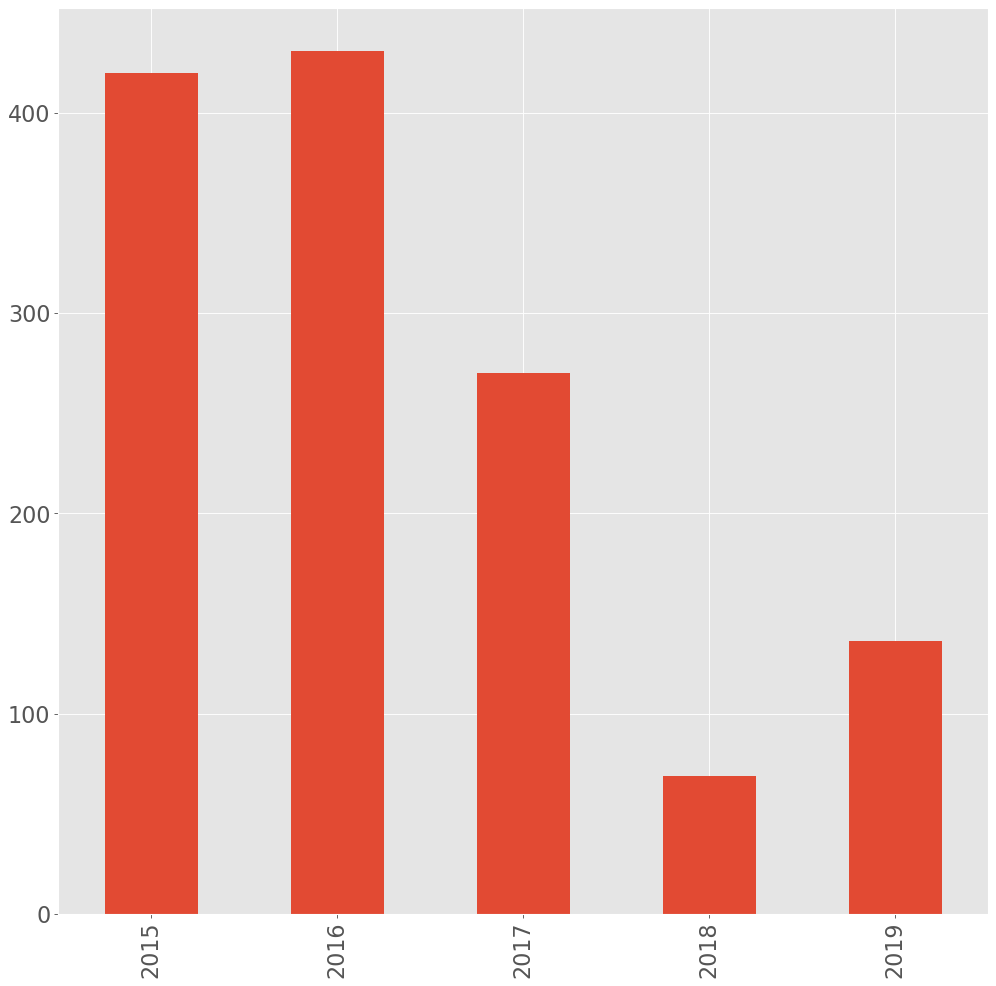

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use(['dark_background'])
plt.style.use('ggplot')
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
df_x['event_dt'].groupby(df_x["event_dt"].dt.year).count().plot(kind="bar")
plt.xlabel("")
#plt.ylabel(" ")
plt.savefig(r"D:\Research\FAERS_Public_Similarity\Results\Tables\xarelt\xarelto_hist_2015-2019.jpg", bbox_inches='tight', pad_inches=0)


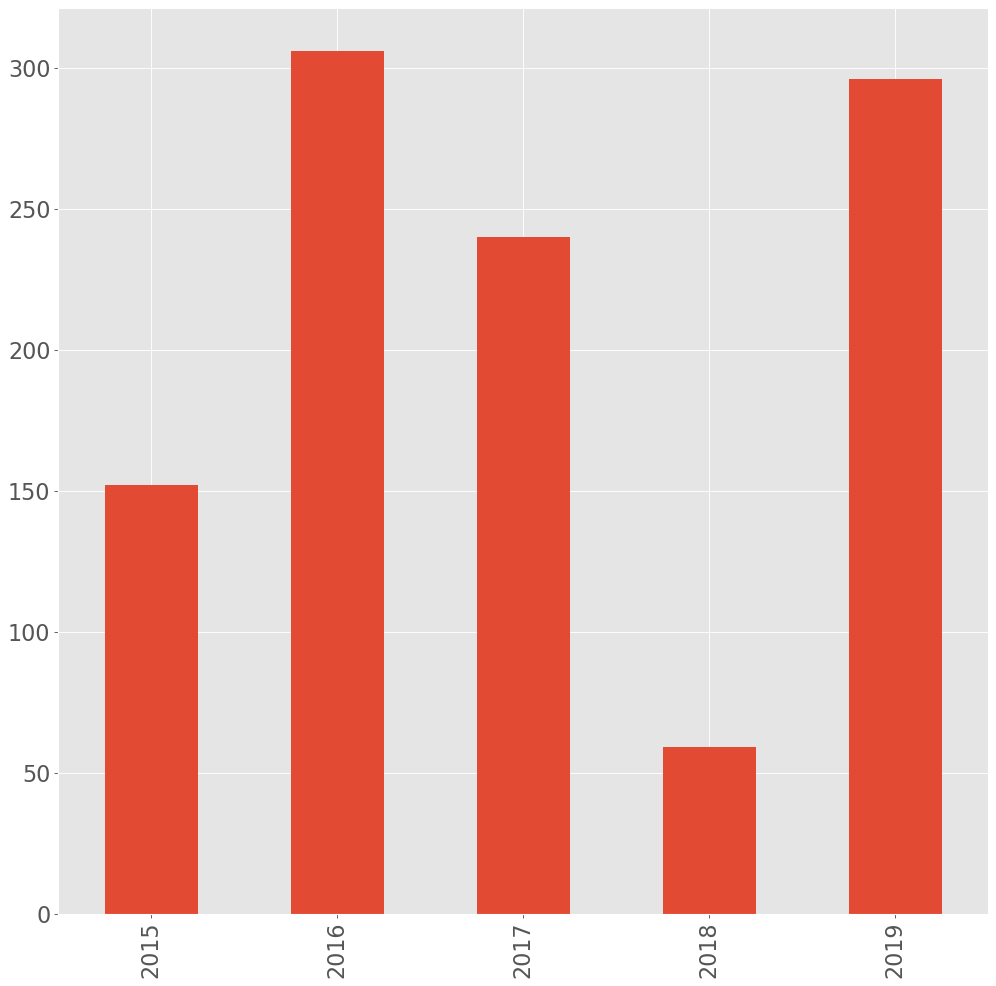

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use(['dark_background'])
plt.style.use('ggplot')
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 



df_p['event_dt'].groupby(df_p["event_dt"].dt.year).count().plot(kind="bar")
plt.xlabel("")
#plt.ylabel(" ")

plt.savefig(r"D:\Research\FAERS_Public_Similarity\Results\Tables\pradax\pradaxa_hist_2015-2019.jpg", bbox_inches='tight', pad_inches=0)


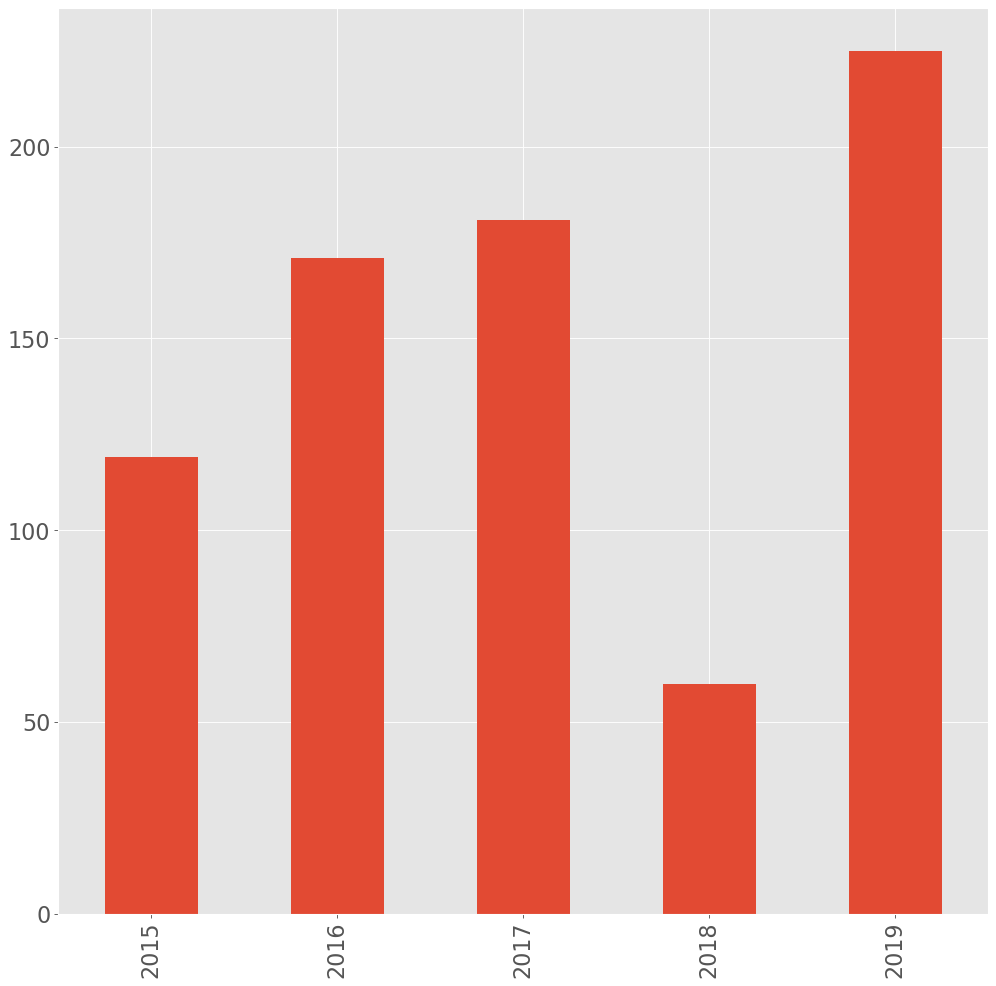

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use(['dark_background'])
plt.style.use('ggplot')
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
df_e['event_dt'].groupby(df_e["event_dt"].dt.year).count().plot(kind="bar")
plt.xlabel("")
#plt.ylabel(" ")
plt.savefig(r"D:\Research\FAERS_Public_Similarity\Results\Tables\eliqui\eliquis_hist_2015-2019.jpg", bbox_inches='tight', pad_inches=0)


In [74]:

df_p.to_csv(r"D:\Research\FAERS_Public_Similarity\Data\analysis_ready\df_pradaxa_europe.csv")
df_e.to_csv(r"D:\Research\FAERS_Public_Similarity\Data\analysis_ready\df_eliquis_europe.csv")
df_x.to_csv(r"D:\Research\FAERS_Public_Similarity\Data\analysis_ready\df_xarelto_europe.csv")

#xarelto


In [75]:
print('done')

done
